# PROBAMOS HERRAMIENTA PIPELINE DE LA BIBLIOTECA TRANSFORMERS
El objetivo es obtener polaridad de distintos set de datos (frases complicadas y  set en ingles)

In [22]:
from transformers import pipeline
import pandas as pd

In [23]:
# Carga el modelo de análisis de sentimientos
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')


In [24]:
# Función para obtener la polaridad de un comentario
def obtener_polaridad(comentario):
    resultado = classifier(comentario)
    return resultado[0]['label']

## FRASES EN ESPAÑOL

In [25]:
# Supongamos que tienes un DataFrame 'df' con una columna 'comentario'
df = pd.DataFrame({'comentario': [
    'Este video es increíble, me encantó!',
    'No me gustó nada, una pérdida de tiempo.',
    'Neutral, no tengo una opinión clara.',
    'El contenido es bueno, pero la calidad del video es baja.',
    'No entiendo por qué tantos dislikes, me pareció genial.'
]})

In [26]:
# Darle un nombre al índice
df.index.name = 'ID'

In [27]:
df.head()

,comentario
ID,
0,"Este video es increíble, me encantó!"
1,"No me gustó nada, una pérdida de tiempo."
2,"Neutral, no tengo una opinión clara."
3,"El contenido es bueno, pero la calidad del vid..."
4,"No entiendo por qué tantos dislikes, me pareci..."


In [28]:
# Aplica la función a cada comentario en el DataFrame
df['polaridad'] = df['comentario'].apply(obtener_polaridad)

In [29]:
df.head()

,comentario,polaridad
ID,,
0,"Este video es increíble, me encantó!",5 stars
1,"No me gustó nada, una pérdida de tiempo.",1 star
2,"Neutral, no tengo una opinión clara.",3 stars
3,"El contenido es bueno, pero la calidad del vid...",3 stars
4,"No entiendo por qué tantos dislikes, me pareci...",5 stars


In [30]:
import re
# Función para extraer números usando expresiones regulares
def extraer_numeros(texto):
    numeros = re.findall(r'\d+', texto)
    return int(numeros[0]) if numeros else None

In [31]:
df['puntuacion'] = df['polaridad'].apply(extraer_numeros)

In [32]:
def positive(puntuacion):
    return 1 if puntuacion in [4, 5] else 0
df['POSITIVE'] = df['puntuacion'].apply(positive)
df['CUMULATIVE_POSITIVE'] = df['POSITIVE'].cumsum()

In [33]:
def neutral(puntuacion):
    return 1 if puntuacion in [3] else 0
df['NEUTRAL'] = df['puntuacion'].apply(neutral)
df['CUMULATIVE_NEUTRAL'] = df['NEUTRAL'].cumsum()

In [34]:
def negative(puntuacion):
    return 1 if puntuacion in [1, 2] else 0
df['NEGATIVE'] = df['puntuacion'].apply(negative)
df['CUMULATIVE_NEGATIVE'] = df['NEGATIVE'].cumsum()

In [35]:
df

,comentario,polaridad,puntuacion,POSITIVE,CUMULATIVE_POSITIVE,NEUTRAL,CUMULATIVE_NEUTRAL,NEGATIVE,CUMULATIVE_NEGATIVE
ID,,,,,,,,,
0,"Este video es increíble, me encantó!",5 stars,5,1,1,0,0,0,0
1,"No me gustó nada, una pérdida de tiempo.",1 star,1,0,1,0,0,1,1
2,"Neutral, no tengo una opinión clara.",3 stars,3,0,1,1,1,0,1
3,"El contenido es bueno, pero la calidad del vid...",3 stars,3,0,1,1,2,0,1
4,"No entiendo por qué tantos dislikes, me pareci...",5 stars,5,1,2,0,2,0,1


## FRASES EN INGLES:
Ahora realizaremos el ejemplo con frases en ingles, con un nuevo df.

In [ ]:
# Supongamos que tienes un DataFrame 'df_ingles' con una columna 'comentario_ingles'
df_ingles = pd.DataFrame({'comentario_ingles': [
    'I love the way this video explains complex concepts.',
    'The speaker was boring, and the content wasn\'t engaging.',
    'I don\'t have a strong opinion either way.',
    'The video had great content, but the audio quality was poor.',
    'I can\'t understand why there are so many dislikes; I thought it was excellent.'
]})

In [ ]:
df_ingles.index.name ="ID"

In [ ]:
df_ingles.head()

,comentario_ingles
ID,
0,I love the way this video explains complex con...
1,"The speaker was boring, and the content wasn't..."
2,I don't have a strong opinion either way.
3,"The video had great content, but the audio qua..."
4,I can't understand why there are so many disli...


In [ ]:
df_ingles["polridad"]=df_ingles["comentario_ingles"].apply(obtener_polaridad)

In [ ]:
df_ingles.head()

,comentario_ingles,polridad
ID,,
0,I love the way this video explains complex con...,5 stars
1,"The speaker was boring, and the content wasn't...",2 stars
2,I don't have a strong opinion either way.,2 stars
3,"The video had great content, but the audio qua...",2 stars
4,I can't understand why there are so many disli...,3 stars


## FRASES EN INGLES NIVEL 2:
Ahora tomaremos comentarios de videos reales, para poner a prueba la libreria.

In [ ]:
df_2 = pd.DataFrame({'comentario_ingles': [
    'Awesome summary / introduction. Thank you so much!',
    'Very helpful tutorial! Many thanks for it! By the way, you speak very clear English and that is extremely helpful for me as a non-native speaker',
    'Excellent tutorial. Cannot believe only 3.7k likes for this. I recommend typing the code out in vscode or other and running in parallel while watching the video.',
    'Very helpful, thanks!',
    'its hard for me to understand all of this coding in AI, some people used the instant library from huggingface, some used the unencapsulated code. Which make me more confused.',
    'complete and short. awesome.',
    'this is way more better than what AWS guys do ...',
    'what app did you switch to one minute in?',
    'Do you run this and visual basics? '
]})

In [ ]:
df_2.index.name= "ID"

In [ ]:
df_2.head()

,comentario_ingles
ID,
0,Awesome summary / introduction. Thank you so m...
1,Very helpful tutorial! Many thanks for it! By ...
2,Excellent tutorial. Cannot believe only 3.7k l...
3,"Very helpful, thanks!"
4,its hard for me to understand all of this codi...


In [ ]:
df_2["polaridad"]=df_2["comentario_ingles"].apply(obtener_polaridad)

In [ ]:
df_2

,comentario_ingles,polaridad
ID,,
0,Awesome summary / introduction. Thank you so m...,5 stars
1,Very helpful tutorial! Many thanks for it! By ...,5 stars
2,Excellent tutorial. Cannot believe only 3.7k l...,5 stars
3,"Very helpful, thanks!",5 stars
4,its hard for me to understand all of this codi...,2 stars
5,complete and short. awesome.,5 stars
6,this is way more better than what AWS guys do ...,5 stars
7,what app did you switch to one minute in?,1 star
8,Do you run this and visual basics?,5 stars


# 3 HERRAMIENTAS DISTINTAS, PARA DETERMINAR POLARIDAD
Como semantica en varios ocaciones, dependien del tipo de video y otros factores. Utilizamos 3 herramientas distintas para comporar resultados y obtener conclusiones mas determinantes a la hora de definir la polaridad.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


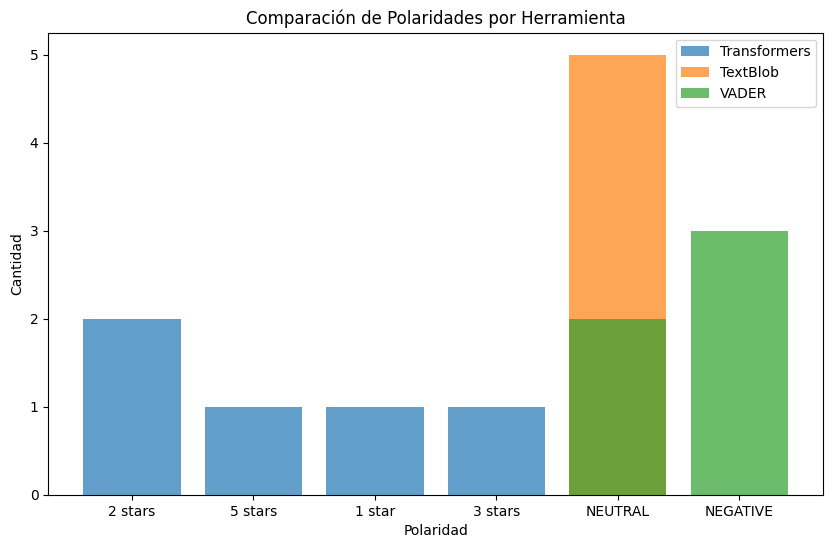

In [ ]:
import pandas as pd
from transformers import pipeline
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')


# Supongamos que tienes un DataFrame 'df_prueba' con una columna 'comentario_prueba'
df_prueba = pd.DataFrame({'comentario_prueba': [
    'Esta película es increíble, me encantó!',
    'No estoy seguro de qué pensar.',
    '¡Qué malo es este producto!',
    'Es posible que no me guste, pero la actuación es buena.',
    'Neutral, sin una opinión clara.'
]})

# Carga el modelo de análisis de sentimientos de Transformers
classifier_transformers = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Función para obtener la polaridad de un comentario utilizando TextBlob
def obtener_polaridad_textblob(comentario):
    analysis = TextBlob(comentario)
    return 'POSITIVE' if analysis.sentiment.polarity > 0 else 'NEGATIVE' if analysis.sentiment.polarity < 0 else 'NEUTRAL'

# Función para obtener la polaridad de un comentario utilizando VADER
def obtener_polaridad_vader(comentario):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(comentario)['compound']
    return 'POSITIVE' if compound_score > 0 else 'NEGATIVE' if compound_score < 0 else 'NEUTRAL'

# Aplica las funciones a cada comentario de prueba en el DataFrame
df_prueba['polaridad_transformers'] = df_prueba['comentario_prueba'].apply(lambda x: classifier_transformers(x)[0]['label'])
df_prueba['polaridad_textblob'] = df_prueba['comentario_prueba'].apply(obtener_polaridad_textblob)
df_prueba['polaridad_vader'] = df_prueba['comentario_prueba'].apply(obtener_polaridad_vader)

# Visualiza los resultados utilizando un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Conteo de las polaridades para cada herramienta
transformers_counts = df_prueba['polaridad_transformers'].value_counts()
textblob_counts = df_prueba['polaridad_textblob'].value_counts()
vader_counts = df_prueba['polaridad_vader'].value_counts()

# Barra para el modelo de Transformers
ax.bar(transformers_counts.index, transformers_counts, alpha=0.7, label='Transformers')

# Barra para TextBlob
ax.bar(textblob_counts.index, textblob_counts, alpha=0.7, label='TextBlob')

# Barra para VADER
ax.bar(vader_counts.index, vader_counts, alpha=0.7, label='VADER')

# Configuración del gráfico
ax.set_title('Comparación de Polaridades por Herramienta')
ax.set_xlabel('Polaridad')
ax.set_ylabel('Cantidad')
ax.legend()

# Muestra el gráfico
plt.show()


In [ ]:
# Esta herramienta clasifica por estrellas
transformers_counts

2 stars    2
5 stars    1
1 star     1
3 stars    1
Name: polaridad_transformers, dtype: int64

In [ ]:
textblob_counts

NEUTRAL    5
Name: polaridad_textblob, dtype: int64

In [ ]:
vader_counts

NEGATIVE    3
NEUTRAL     2
Name: polaridad_vader, dtype: int64